In [10]:
from keras.models import load_model

In [11]:
model = load_model('cats_and_dogs_small_2_1.h5')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36992)             0         
__________

In [12]:
img_path = '/Users/schp/Desktop/样本/dogs-vs-cats-small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


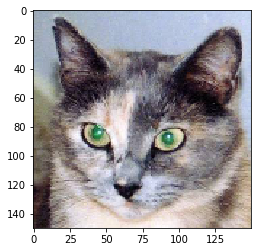

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img_tensor[0])
plt.show()

### 测试的猫图像

为了提取想要查看的特征图，需要创建一个keras模型，以图像批量作为输入，并输出所有卷积层和迟化层的激活。为此，我们需要用keras的Model类。模型实例化需要两个参数：一个输入张量（或输入张量的列表）和一个输出张量（或输出张量的列表）。得到的类是一个keras模型，就像熟悉的Sequential模型一样，将特定输入映射为特定输出。Model类允许模型有多个输出，这一点与Sequential不同

#### 用一个输入张量和一个输出张量列表将模型实例化

In [14]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
print(model.input)
print(layer_outputs)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Tensor("conv2d_14_input_2:0", shape=(?, 150, 150, 3), dtype=float32)
[<tf.Tensor 'conv2d_14_2/Relu:0' shape=(?, 148, 148, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_13_2/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>, <tf.Tensor 'conv2d_15_2/Relu:0' shape=(?, 72, 72, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_14_2/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>, <tf.Tensor 'conv2d_16_2/Relu:0' shape=(?, 34, 34, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_15_2/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>, <tf.Tensor 'flatten_5_2/Reshape:0' shape=(?, ?) dtype=float32>, <tf.Tensor 'dropout_3_2/cond/Merge:0' shape=(?, ?) dtype=float32>]


#### 以预测模式运行模型

In [15]:
activations = activation_model.predict(img_tensor)

In [16]:
len(activations)

8

In [17]:
first_layer_activation = activations[0]
second_layer_activation = activations[1]
third_layer_activation = activations[2]
print(first_layer_activation.shape)
print(second_layer_activation.shape)
print(third_layer_activation.shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)


它是大小为148\*148的特征图，有32个通道，绘制下原始模型第一层激活的第四个通道

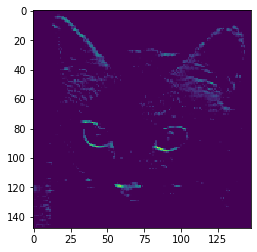

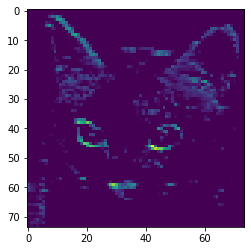

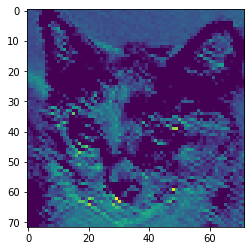

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.figure()
plt.imshow(second_layer_activation[0, :, :, 4], cmap='viridis')
plt.figure()
plt.imshow(third_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

#### 绘制网络中所有激活的完整可视化
我们需要在8个特征图中的每个中提取并绘制每一个通道，然后将结果叠加在一个大的图像张量中，按通道并排

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 36992)


MemoryError: 

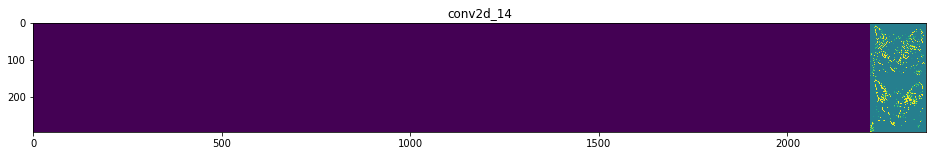

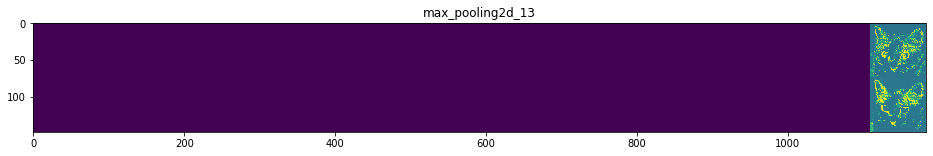

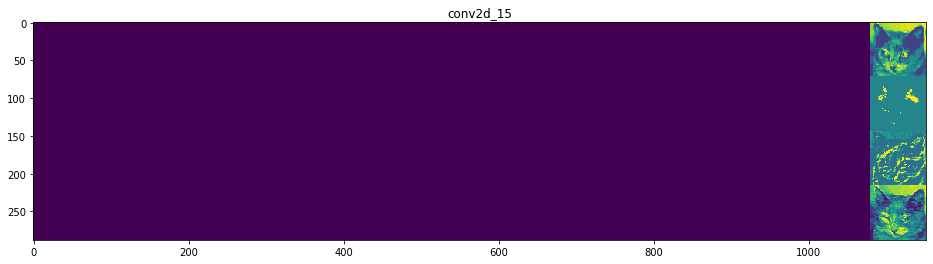

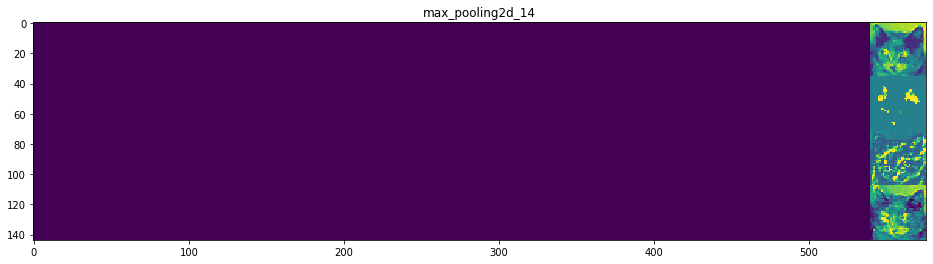

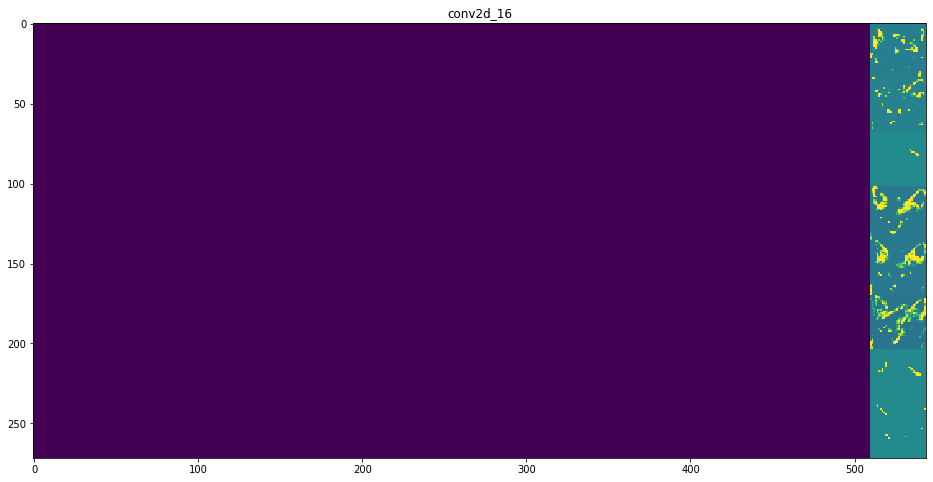

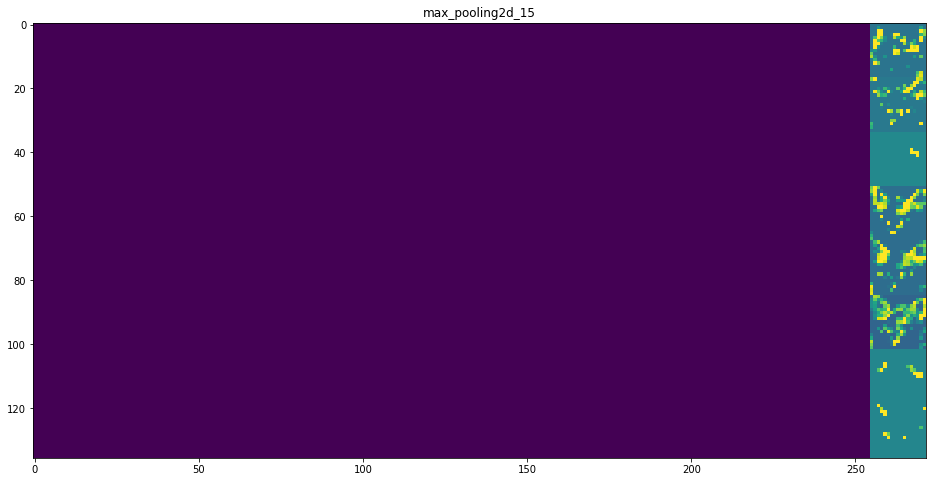

In [34]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
image_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_activation.shape)
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]  # 特征图形状为（1， size，size，n_features）
    
    n_cols = n_features // image_per_row  # 在这个矩阵中将激活平铺
    display_grid = np.zeros((size * n_cols, image_per_row * size))
    
    for col in range(n_cols):
        for row in range(image_per_row):
            channel_image = layer_activation[0,:,:,col*image_per_row+row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size: (row + 1) * size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [20]:
layer_names

['conv2d_14',
 'max_pooling2d_13',
 'conv2d_15',
 'max_pooling2d_14',
 'conv2d_16',
 'max_pooling2d_15',
 'flatten_5',
 'dropout_3']